# 택시요금 데이터 다루기

목표: 이전 학습에서 배웠던 다양한 Data Cleaning 기술을 활용하여 Cleaning된 나만의 데이터를 만들기

**Step 1. 이것은 꼭 해보기**
1. 결측치 판단 및 처리
    - 결측치의 유무와 비율을 살펴보고 적절한 방법으로 처리
2. 이상치 판단 및 처리
    - 숫자형 변수 각각에 대해, 데이터의 index와 변수 값 사이의 scatter plot을 그려고보고 이상치가 관찰될 경우 제거

**Step 2. 이런 것도 해보기**
1. 택시 탑승 및 하차 시간을 활용할 수 있을지 고민
    - 택시의 주행 시간과 주행 거리, 요금 등의 상관관계 살펴보기
2. Credit Card와 Debit Card 구분없이 Card라는 이름 만들어 보기

**평가기준**
1. 데이터의 특성을 확인하고, 해당 정보를 해석할 수 있는가?
    - 데이터 전처리 과정이 논리적으로 전개 되었는가?
2. 결측치 및 이상치를 판별할 수 있고, 해당 데이터를 처리할 수 있는가?
    - 결측치 및 이상치 감지 방법의 적절하고 감지된 이상치 및 결측치에 대한 처리 방법이 효과적인가?
3. 텍스트 및 날짜 데이터를 자유롭게 변환하고 필요한 정보를 추출할 수 있는가?
    - 데이터 변환 기법을 적합하게 사용하여 필요한 정보를 추출할 수 있는가?

## 데이터 로드
수집한 데이터를 프로그램에 로드하여 작업할 수 있도록 한다.

### 필요한 라이브러리 불러오기

In [414]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

### 데이터 불러오기

In [415]:
trip = pd.read_csv("/Users/project/aiffel/trip/trip.csv")

## 데이터 확인 및 기본 통계 분석
데이터의 일반적인 통계적 특성을 확인하고, 데이터셋의 구조를 살펴본다.

### 데이터 구조

In [416]:
trip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22701 entries, 0 to 22700
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   passenger_name         22701 non-null  object 
 1   tpep_pickup_datetime   22701 non-null  object 
 2   tpep_dropoff_datetime  22701 non-null  object 
 3   payment_method         22701 non-null  object 
 4   passenger_count        22701 non-null  int64  
 5   trip_distance          22701 non-null  float64
 6   fare_amount            22698 non-null  float64
 7   tip_amount             22701 non-null  float64
 8   tolls_amount           22701 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.6+ MB


0. passenger_name: 승객이름  
1. tpep_pickup_datetime: 승차시간  
2. pep_dropoff_datetime: 하차시간  
3. payment_method: 결제수단  
4. passenger_count: 승객 수  
5. trip_distance: 주행 거리  
6. fare_amount: 운임료  
7. tip_amount: 팁  
8. tolls_amount: 통행료

### 헤더 및 샘플 데이터

#### head, tail

In [417]:
trip.head()

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.0,2.76,0.0
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.0,4.00,0.0
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.5,1.45,0.0
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.0
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.5,0.00,0.0


In [418]:
trip.tail()

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
22696,Austin Johnson,02/24/2017 5:37:23 PM,02/24/2017 5:40:39 PM,Cash,3,0.61,4.0,0.00,0.00
22697,Monique Williams,08/06/2017 4:43:59 PM,08/06/2017 5:24:47 PM,Cash,1,16.71,52.0,14.64,5.76
22698,Drew Graves,09/04/2017 2:54:14 PM,09/04/2017 2:58:22 PM,Debit Card,1,0.42,4.5,0.00,0.00
22699,Jonathan Copeland,07/15/2017 12:56:30 PM,07/15/2017 1:08:26 PM,Debit Card,1,2.36,10.5,1.70,0.00
22700,Benjamin Miller,03/02/2017 1:02:49 PM,03/02/2017 1:16:09 PM,Cash,1,2.10,11.0,2.35,0.00


#### 각 칼럼별 유니크

In [419]:
trip['passenger_name'].unique()

array(['Pamela Duffy', 'Michelle Foster', 'Tina Combs', ...,
       'Drew Graves', 'Jonathan Copeland', 'Benjamin Miller'],
      dtype=object)

In [420]:
trip['tpep_pickup_datetime'].unique()

array(['03/25/2017 8:55:43 AM', '04/11/2017 2:53:28 PM',
       '12/15/2017 7:26:56 AM', ..., '09/04/2017 2:54:14 PM',
       '07/15/2017 12:56:30 PM', '03/02/2017 1:02:49 PM'], dtype=object)

In [421]:
trip['tpep_dropoff_datetime'].unique()

array(['03/25/2017 9:09:47 AM', '04/11/2017 3:19:58 PM',
       '12/15/2017 7:34:08 AM', ..., '09/04/2017 2:58:22 PM',
       '07/15/2017 1:08:26 PM', '03/02/2017 1:16:09 PM'], dtype=object)

In [422]:
trip['payment_method'].unique()

array(['Debit Card', 'Cash', 'Credit Card'], dtype=object)

In [423]:
trip['passenger_count'].unique()

array([ 6,  1,  2,  4,  5,  3, 36,  0])

In [424]:
trip['trip_distance'].unique()

array([ 3.34,  1.8 ,  1.  , ..., 25.3 , 10.64, 16.71])

In [425]:
trip['fare_amount'].unique()

array([ 1.3000e+01,  1.6000e+01,  6.5000e+00,  2.0500e+01,  1.6500e+01,
        9.0000e+00,  4.7500e+01,  1.1500e+01,  5.2000e+01,  1.5000e+01,
        9.5000e+00,  1.7500e+01,  1.9000e+01,  1.2500e+01,  5.0000e+00,
        6.8250e+01,  5.5000e+00,  7.0000e+00,  8.0000e+00,  1.1000e+01,
        8.0000e+01,  1.0500e+01,  4.0500e+01,  1.5500e+01,  4.0000e+00,
        7.5000e+00,  8.5000e+00,  3.1500e+01,  3.5000e+00,  2.5500e+01,
               nan,  4.5000e+00,  3.2500e+01,  1.0000e+01,  2.1000e+01,
        2.1500e+01,  2.8000e+01,  6.0000e+00,  1.7000e+01,  3.0500e+01,
        3.9000e+01,  1.4500e+01,  3.4500e+01,  3.1000e+01,  1.8500e+01,
        1.9500e+01,  2.4000e+01,  1.3500e+01,  2.2500e+01,  2.2000e+01,
        2.0000e+01,  3.9500e+01,  2.4500e+01,  5.1500e+01,  2.3000e+01,
        1.2000e+01,  1.4000e+01,  7.1500e+01,  6.9500e+01,  2.9000e+01,
        1.8000e+01,  5.5000e+01,  2.6000e+01,  2.5000e+00,  4.5000e+01,
        4.5500e+01,  2.3500e+01, -2.5000e+00,  7.8000e+01,  4.10

In [426]:
trip['tip_amount'].unique()

array([2.760e+00, 4.000e+00, 1.450e+00, 6.390e+00, 0.000e+00, 2.060e+00,
       9.860e+00, 1.780e+00, 2.750e+00, 2.460e+00, 1.458e+01, 3.350e+00,
       2.160e+00, 4.550e+00, 3.000e+00, 2.850e+00, 3.200e+00, 1.200e+01,
       1.000e+00, 2.050e+00, 1.250e+00, 2.790e+00, 2.350e+00, 1.856e+01,
       1.770e+00, 3.450e+00, 1.700e+00, 7.200e-01, 5.000e+00, 2.260e+00,
       1.950e+00, 2.000e+00, 1.820e+00, 1.360e+00, 2.550e+00, 6.560e+00,
       8.600e-01, 1.260e+00, 6.760e+00, 4.050e+00, 3.390e+00, 1.590e+00,
       1.160e+00, 1.760e+00, 1.150e+00, 5.760e+00, 2.860e+00, 1.460e+00,
       2.220e+00, 1.860e+00, 5.340e+00, 3.660e+00, 5.300e+00, 9.100e+00,
       5.000e-01, 1.240e+00, 1.200e+00, 7.050e+00, 8.080e+00, 4.660e+00,
       3.320e+00, 1.350e+00, 4.460e+00, 7.000e-01, 4.560e+00, 3.750e+00,
       1.170e+00, 1.060e+00, 2.200e+00, 1.050e+00, 2.660e+00, 1.160e+01,
       3.950e+00, 2.650e+00, 3.560e+00, 3.760e+00, 2.360e+00, 2.960e+00,
       1.650e+00, 1.020e+00, 3.150e+00, 3.050e+00, 

In [427]:
trip['tolls_amount'].unique()

array([ 0.  ,  5.54, 16.26, 11.52,  5.76, 10.5 , 16.5 ,  2.64, 12.5 ,
       15.  ,  2.54,  8.5 , 18.26, 19.1 , 13.  ,  2.16, 15.5 ,  5.44,
       17.28, 15.58,  5.49, 13.45,  6.  , 16.  , 17.5 ,  8.  , 11.75,
       18.  ,  8.4 , 16.2 , 18.28,  2.7 , 16.62,  8.16,  5.16,  5.45,
        4.32,  6.32])

### 기술 통계량

In [428]:
trip.describe()

,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
count,22701.000000,22701.000000,22698.000000,22701.000000,22701.000000
mean,1.643584,2.913400,13.024009,1.835745,0.312514
std,1.304942,3.653023,13.240074,2.800537,1.399153
min,0.000000,0.000000,-120.000000,0.000000,0.000000
25%,1.000000,0.990000,6.500000,0.000000,0.000000
50%,1.000000,1.610000,9.500000,1.350000,0.000000
75%,2.000000,3.060000,14.500000,2.450000,0.000000
max,36.000000,33.960000,999.990000,200.000000,19.100000


- passenger_count
    - 평균 탑승 인원: 약 1.64명
    - 최소값: 0
        - 0명의 승객이 있는 데이터도 있는 것으로 보인다.
    - 최대값: 36명
        - 이상치로 보일 수 있다.

- trip_distance
    - 평균 주행 거리: 약 2.91마일
    - 최소값: 0
        - 주행 거리가 0인 데이터도 있는 것으로 보인다.
    - 최대값: 33.96마일

- fare_amount
    - 평균 요금: 약 13.02달러
    - 최소값: -120달러
        - 요금이 음수인 이상치가 있는 것으로 보인다.
    - 최대값: 999.99달러

- tip_amount
    - 평균 팁 금액: 약 1.84달러
    - 최소값: 0
        - 팁이 없는 경우가 있는 것으로 보인다.
    - 최대값: 200달러

- tolls_amount
    - 평균 톨 비용: 약 0.31달러
    - 최소값과 최대값이 0에서 19.1까지 다양하게 분포되어 있다.

### 결측치 확인

In [429]:
trip.isna().sum()

passenger_name           0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
payment_method           0
passenger_count          0
trip_distance            0
fare_amount              3
tip_amount               0
tolls_amount             0
dtype: int64

In [430]:
trip[trip['fare_amount'].isna()]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
52,Benjamin Johnson,04/04/2017 4:22:03 PM,04/04/2017 4:35:30 PM,Cash,1,2.20,NaN,0.0,0.00
189,Maria Ibarra,08/21/2017 12:40:25 PM,08/21/2017 1:12:31 PM,Debit Card,3,15.20,NaN,5.0,0.00
244,Tina Avila,08/09/2017 8:32:09 AM,08/09/2017 9:31:11 AM,Cash,1,15.89,NaN,10.0,5.76


### 이상치 확인

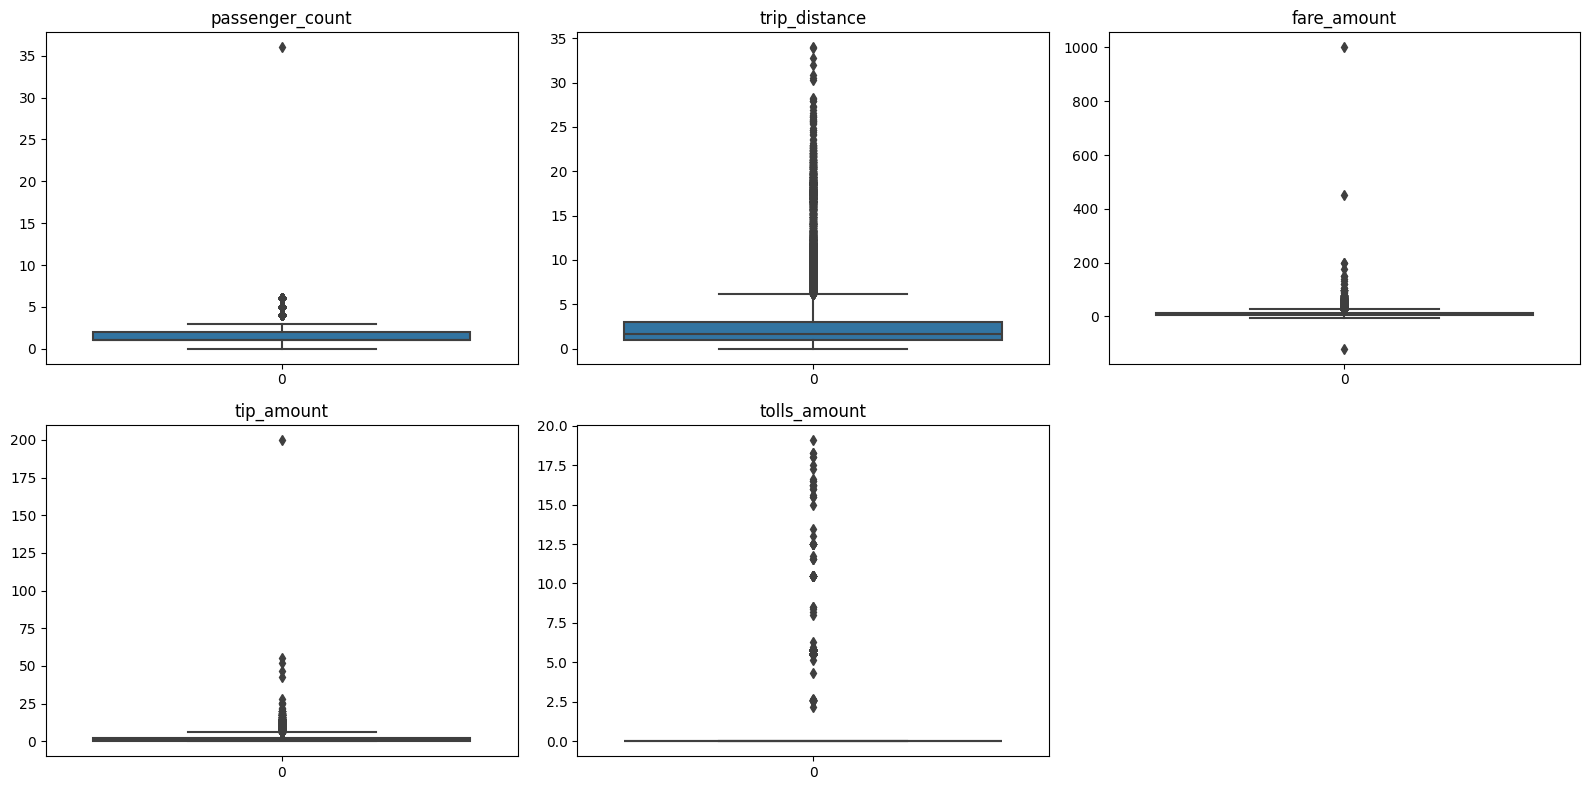

In [431]:
# 숫자 컬럼만 선택
numerical_cols = trip.select_dtypes(include=[np.number]).columns.tolist()

# 서브블롯의 행을 계산
num_cols = len(numerical_cols)
num_rows = num_cols // 4
num_rows += num_cols % 4

position = range(1, num_cols + 1)

fig = plt.figure(figsize=(16, num_rows * 4))

#서브플롯으로 boxplot 그리기
for k, col in zip(position, numerical_cols):
  ax = fig.add_subplot(num_rows, 3, k)
  sns.boxplot(trip[col], ax=ax)
  ax.set_title(col)

plt.tight_layout()
plt.show()

1. passenger_count
- 36명은 이상치로 보고 처리한다.

In [432]:
# 승객수 유니크값
trip['passenger_count'].value_counts()

passenger_count
1     16119
2      3305
5      1143
3       953
6       692
4       455
0        33
36        1
Name: count, dtype: int64

<Axes: xlabel='passenger_count'>

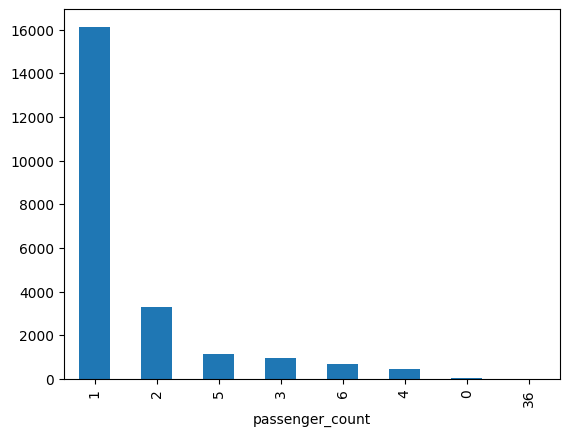

In [433]:
trip['passenger_count'].value_counts().plot(kind='bar')

In [434]:
trip[trip['passenger_count'] == 36]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
64,Manuel Dickson,10/05/2017 9:39:28 AM,10/05/2017 9:42:32 AM,Debit Card,36,0.22,21.5,0.0,0.0


2. trip_distance
- 주행 거리가 0인 행은 이상치로 보고 처리한다.

In [435]:
# 주행 거리가 0인 행 추출
trip[trip['trip_distance'] == 0]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
129,Linda Kaufman,06/22/2017 8:05:33 AM,06/22/2017 8:05:40 AM,Debit Card,1,0.0,20.0,0.00,0.0
248,Erik Perez,09/18/2017 8:50:53 PM,09/18/2017 8:51:03 PM,Cash,1,0.0,2.5,0.00,0.0
293,Deborah Sanford,10/04/2017 7:46:24 PM,10/04/2017 7:46:50 PM,Cash,1,0.0,2.5,0.00,0.0
321,Ryan Hughes,02/22/2017 4:01:44 AM,02/22/2017 4:01:53 AM,Cash,1,0.0,2.5,0.00,0.0
426,David Parker,01/14/2017 7:00:26 AM,01/14/2017 7:00:53 AM,Cash,1,0.0,2.5,6.70,0.0
...,...,...,...,...,...,...,...,...,...
22192,Angela French,10/16/2017 8:34:07 AM,10/16/2017 8:34:10 AM,Credit Card,1,0.0,2.5,0.00,0.0
22327,Kelsey Rogers,07/21/2017 11:30:29 PM,07/21/2017 11:31:12 PM,Debit Card,1,0.0,16.8,3.42,0.0
22385,Joseph Castillo,01/07/2017 4:48:42 AM,01/07/2017 4:51:03 AM,Cash,1,0.0,10.0,0.00,0.0
22568,Christine Edwards,03/07/2017 2:24:47 AM,03/07/2017 2:24:50 AM,Credit Card,1,0.0,0.0,0.00,0.0


3. fare_amount
- 요금이 음수인 데이터는 이상치로 보고 처리한다.

In [436]:
trip[trip['fare_amount'] <= 0]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
316,Tiffany Johnson,12/13/2017 2:02:39 AM,12/13/2017 2:03:08 AM,Cash,6,0.12,-2.5,0.0,0.0
1648,Debbie Holmes,07/05/2017 11:02:23 AM,07/05/2017 11:03:00 AM,Credit Card,1,0.04,-2.5,0.0,0.0
4404,Mrs. Tiffany Brown DDS,12/20/2017 4:06:53 PM,12/20/2017 4:47:50 PM,Cash,1,7.06,0.0,0.0,0.0
4425,Bobby Wilson,11/16/2017 8:13:30 PM,11/16/2017 8:14:50 PM,Cash,2,0.06,-3.0,0.0,0.0
5450,Alejandro Williams,04/06/2017 12:50:26 PM,04/06/2017 12:52:39 PM,Debit Card,1,0.25,-3.5,0.0,0.0
5724,William Holland,06/12/2017 12:08:55 PM,06/12/2017 12:08:57 PM,Debit Card,1,0.00,0.0,0.0,0.0
5760,Samuel Cooper,01/03/2017 8:15:23 PM,01/03/2017 8:15:39 PM,Debit Card,1,0.02,-2.5,0.0,0.0
8206,Stephanie Summers,10/28/2017 8:39:36 PM,10/28/2017 8:41:59 PM,Credit Card,1,0.41,-3.5,0.0,0.0
10283,Donna Larson,06/05/2017 5:34:25 PM,06/05/2017 5:36:29 PM,Credit Card,2,0.00,-2.5,0.0,0.0
10508,Travis Vega,03/30/2017 3:14:26 AM,03/30/2017 3:14:28 AM,Debit Card,1,0.00,0.0,0.0,0.0


4. tip_amount
- 팁은 무조건적인 게 아니기 때문에 이상치가 있어도 처리할 필요는 없어보인다.

5. tolls_amount
- 통행료도 마찬가지로 처리할 필요가 없어보인다.

## 데이터 형식 변환
데이터의 형식을 분석에 적합한 형태로 변환한다.  
결측치 처리 전에 datetime feature를 먼저 변환하고 해야할 거 같다.

### datetime 으로 변환

In [437]:
trip['tpep_dropoff_datetime'].dtype # object
trip['tpep_pickup_datetime'].dtype  # object

dtype('O')

In [438]:
trip['tpep_pickup_datetime'] = pd.to_datetime(trip['tpep_pickup_datetime'])
trip['tpep_dropoff_datetime'] = pd.to_datetime(trip['tpep_dropoff_datetime'])

In [439]:
trip

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,Pamela Duffy,2017-03-25 08:55:43,2017-03-25 09:09:47,Debit Card,6,3.34,13.0,2.76,0.00
1,Michelle Foster,2017-04-11 14:53:28,2017-04-11 15:19:58,Debit Card,1,1.80,16.0,4.00,0.00
2,Tina Combs,2017-12-15 07:26:56,2017-12-15 07:34:08,Debit Card,1,1.00,6.5,1.45,0.00
3,Anthony Ray,2017-05-07 13:17:59,2017-05-07 13:48:14,Cash,1,3.70,20.5,6.39,0.00
4,Brianna Johnson,2017-04-15 23:32:20,2017-04-15 23:49:03,Debit Card,1,4.37,16.5,0.00,0.00
...,...,...,...,...,...,...,...,...,...
22696,Austin Johnson,2017-02-24 17:37:23,2017-02-24 17:40:39,Cash,3,0.61,4.0,0.00,0.00
22697,Monique Williams,2017-08-06 16:43:59,2017-08-06 17:24:47,Cash,1,16.71,52.0,14.64,5.76
22698,Drew Graves,2017-09-04 14:54:14,2017-09-04 14:58:22,Debit Card,1,0.42,4.5,0.00,0.00
22699,Jonathan Copeland,2017-07-15 12:56:30,2017-07-15 13:08:26,Debit Card,1,2.36,10.5,1.70,0.00


### 년도, 시간 나누기

In [440]:
trip['tpep_pickup_date'] = trip['tpep_pickup_datetime'].apply(lambda x: x.date())
trip['tpep_pickup_time'] = trip['tpep_pickup_datetime'].apply(lambda x: x.time())

In [441]:
trip['tpep_dropoff_date'] = trip['tpep_dropoff_datetime'].apply(lambda x: x.date())
trip['tpep_dropoff_time'] = trip['tpep_dropoff_datetime'].apply(lambda x: x.time())
trip

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,tpep_pickup_date,tpep_pickup_time,tpep_dropoff_date,tpep_dropoff_time
0,Pamela Duffy,2017-03-25 08:55:43,2017-03-25 09:09:47,Debit Card,6,3.34,13.0,2.76,0.00,2017-03-25,08:55:43,2017-03-25,09:09:47
1,Michelle Foster,2017-04-11 14:53:28,2017-04-11 15:19:58,Debit Card,1,1.80,16.0,4.00,0.00,2017-04-11,14:53:28,2017-04-11,15:19:58
2,Tina Combs,2017-12-15 07:26:56,2017-12-15 07:34:08,Debit Card,1,1.00,6.5,1.45,0.00,2017-12-15,07:26:56,2017-12-15,07:34:08
3,Anthony Ray,2017-05-07 13:17:59,2017-05-07 13:48:14,Cash,1,3.70,20.5,6.39,0.00,2017-05-07,13:17:59,2017-05-07,13:48:14
4,Brianna Johnson,2017-04-15 23:32:20,2017-04-15 23:49:03,Debit Card,1,4.37,16.5,0.00,0.00,2017-04-15,23:32:20,2017-04-15,23:49:03
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22696,Austin Johnson,2017-02-24 17:37:23,2017-02-24 17:40:39,Cash,3,0.61,4.0,0.00,0.00,2017-02-24,17:37:23,2017-02-24,17:40:39
22697,Monique Williams,2017-08-06 16:43:59,2017-08-06 17:24:47,Cash,1,16.71,52.0,14.64,5.76,2017-08-06,16:43:59,2017-08-06,17:24:47
22698,Drew Graves,2017-09-04 14:54:14,2017-09-04 14:58:22,Debit Card,1,0.42,4.5,0.00,0.00,2017-09-04,14:54:14,2017-09-04,14:58:22
22699,Jonathan Copeland,2017-07-15 12:56:30,2017-07-15 13:08:26,Debit Card,1,2.36,10.5,1.70,0.00,2017-07-15,12:56:30,2017-07-15,13:08:26


### 칼럼 재정의

In [442]:
trip.columns

Index(['passenger_name', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'payment_method', 'passenger_count', 'trip_distance', 'fare_amount',
       'tip_amount', 'tolls_amount', 'tpep_pickup_date', 'tpep_pickup_time',
       'tpep_dropoff_date', 'tpep_dropoff_time'],
      dtype='object')

In [443]:
# 열을 원하는 순서대로 재배치
trip = trip[['passenger_name', 'tpep_pickup_date', 'tpep_pickup_time', 
             'tpep_dropoff_date', 'tpep_dropoff_time',
             'payment_method', 'passenger_count', 'trip_distance', 'fare_amount',
            'tip_amount', 'tolls_amount']]
trip

,passenger_name,tpep_pickup_date,tpep_pickup_time,tpep_dropoff_date,tpep_dropoff_time,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,Pamela Duffy,2017-03-25,08:55:43,2017-03-25,09:09:47,Debit Card,6,3.34,13.0,2.76,0.00
1,Michelle Foster,2017-04-11,14:53:28,2017-04-11,15:19:58,Debit Card,1,1.80,16.0,4.00,0.00
2,Tina Combs,2017-12-15,07:26:56,2017-12-15,07:34:08,Debit Card,1,1.00,6.5,1.45,0.00
3,Anthony Ray,2017-05-07,13:17:59,2017-05-07,13:48:14,Cash,1,3.70,20.5,6.39,0.00
4,Brianna Johnson,2017-04-15,23:32:20,2017-04-15,23:49:03,Debit Card,1,4.37,16.5,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...
22696,Austin Johnson,2017-02-24,17:37:23,2017-02-24,17:40:39,Cash,3,0.61,4.0,0.00,0.00
22697,Monique Williams,2017-08-06,16:43:59,2017-08-06,17:24:47,Cash,1,16.71,52.0,14.64,5.76
22698,Drew Graves,2017-09-04,14:54:14,2017-09-04,14:58:22,Debit Card,1,0.42,4.5,0.00,0.00
22699,Jonathan Copeland,2017-07-15,12:56:30,2017-07-15,13:08:26,Debit Card,1,2.36,10.5,1.70,0.00


#### 두 날짜 열이 서로 다른 행 추출

두 행이 같은 열이면 하나로 합치려고 했으나 다른 값이 존재하기 때문에 넘어간다.

In [444]:
trip[['tpep_pickup_date', 'tpep_dropoff_date']]

,tpep_pickup_date,tpep_dropoff_date
0,2017-03-25,2017-03-25
1,2017-04-11,2017-04-11
2,2017-12-15,2017-12-15
3,2017-05-07,2017-05-07
4,2017-04-15,2017-04-15
...,...,...
22696,2017-02-24,2017-02-24
22697,2017-08-06,2017-08-06
22698,2017-09-04,2017-09-04
22699,2017-07-15,2017-07-15


In [445]:
trip[trip['tpep_pickup_date'] != trip['tpep_dropoff_date']][['tpep_pickup_date', 'tpep_dropoff_date']]

,tpep_pickup_date,tpep_dropoff_date
30,2017-11-06,2017-11-07
121,2017-06-09,2017-06-10
249,2017-12-06,2017-12-07
280,2017-03-03,2017-03-04
381,2017-09-24,2017-09-25
...,...,...
22280,2017-05-18,2017-05-19
22337,2017-08-03,2017-08-04
22535,2017-10-03,2017-10-04
22543,2017-08-16,2017-08-17


### 필요없는 열 삭제
승객 이름은 필요 없다고 판단하여 삭제함

In [446]:
trip.drop(columns='passenger_name', inplace=True)
trip

/var/folders/zw/1zmd_ykn3zbd2m00vrvhv5m40000gn/T/ipykernel_24891/883619698.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trip.drop(columns='passenger_name', inplace=True)


,tpep_pickup_date,tpep_pickup_time,tpep_dropoff_date,tpep_dropoff_time,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,2017-03-25,08:55:43,2017-03-25,09:09:47,Debit Card,6,3.34,13.0,2.76,0.00
1,2017-04-11,14:53:28,2017-04-11,15:19:58,Debit Card,1,1.80,16.0,4.00,0.00
2,2017-12-15,07:26:56,2017-12-15,07:34:08,Debit Card,1,1.00,6.5,1.45,0.00
3,2017-05-07,13:17:59,2017-05-07,13:48:14,Cash,1,3.70,20.5,6.39,0.00
4,2017-04-15,23:32:20,2017-04-15,23:49:03,Debit Card,1,4.37,16.5,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...
22696,2017-02-24,17:37:23,2017-02-24,17:40:39,Cash,3,0.61,4.0,0.00,0.00
22697,2017-08-06,16:43:59,2017-08-06,17:24:47,Cash,1,16.71,52.0,14.64,5.76
22698,2017-09-04,14:54:14,2017-09-04,14:58:22,Debit Card,1,0.42,4.5,0.00,0.00
22699,2017-07-15,12:56:30,2017-07-15,13:08:26,Debit Card,1,2.36,10.5,1.70,0.00


In [447]:
trip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22701 entries, 0 to 22700
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tpep_pickup_date   22701 non-null  object 
 1   tpep_pickup_time   22701 non-null  object 
 2   tpep_dropoff_date  22701 non-null  object 
 3   tpep_dropoff_time  22701 non-null  object 
 4   payment_method     22701 non-null  object 
 5   passenger_count    22701 non-null  int64  
 6   trip_distance      22701 non-null  float64
 7   fare_amount        22698 non-null  float64
 8   tip_amount         22701 non-null  float64
 9   tolls_amount       22701 non-null  float64
dtypes: float64(4), int64(1), object(5)
memory usage: 1.7+ MB


## 결측치 처리
결측치(누락된 값)를 확인하고, 적절한 방법으로 처리한다.

In [448]:
trip[trip['fare_amount'].isna()]

,tpep_pickup_date,tpep_pickup_time,tpep_dropoff_date,tpep_dropoff_time,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
52,2017-04-04,16:22:03,2017-04-04,16:35:30,Cash,1,2.20,NaN,0.0,0.00
189,2017-08-21,12:40:25,2017-08-21,13:12:31,Debit Card,3,15.20,NaN,5.0,0.00
244,2017-08-09,08:32:09,2017-08-09,09:31:11,Cash,1,15.89,NaN,10.0,5.76


In [449]:
trip.select_dtypes(include='number').corr()

,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
passenger_count,1.000000,0.015488,0.011052,-0.010481,0.009171
trip_distance,0.015488,1.000000,0.756430,0.502227,0.622848
fare_amount,0.011052,0.756430,1.000000,0.678662,0.513803
tip_amount,-0.010481,0.502227,0.678662,1.000000,0.422323
tolls_amount,0.009171,0.622848,0.513803,0.422323,1.000000


<Axes: >

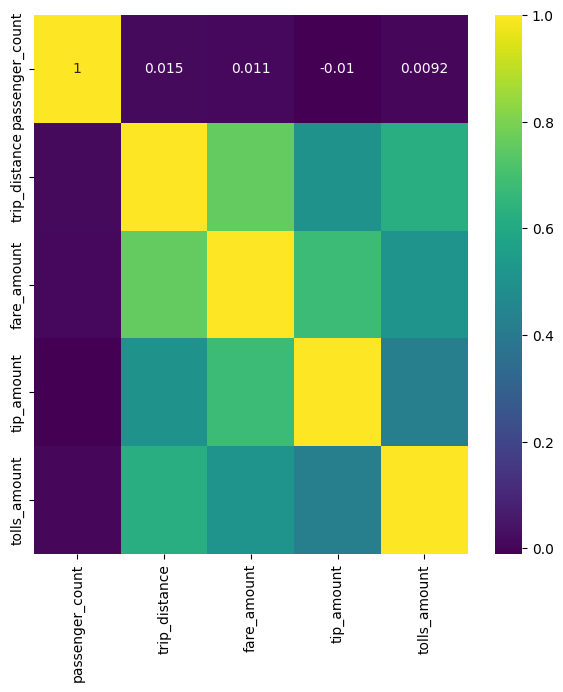

In [450]:
plt.figure(figsize=(7, 7))
trip_corr = trip.select_dtypes(include='number').corr()
sns.heatmap(trip_corr, annot=True, cmap='viridis')
# 숫자가 안보이는 이유?

- 히트맵 수치가 보이지 않는 문제
    - figure size : 크게 해보았으나 안보임
    - pip install --upgrade seaborn : seaborn 버전 문제
    - pip install --upgrade matplotlib: matplotlib 버전 문제
- 컬러맵까지 설정하였으나 안보임!🥲

### 선형 보간법
끝점의 값이 주어졌을 때 그 사이에 위치한 값을 추정하기 위하여 직선 거리에 따라 선형적으로 계산하는 방법

In [451]:
trip['fare_amount'].interpolate(method='linear', inplace=True)
print(f'polynomial interpolation imputation: \n {trip.isna().sum()}')

polynomial interpolation imputation: 
 tpep_pickup_date     0
tpep_pickup_time     0
tpep_dropoff_date    0
tpep_dropoff_time    0
payment_method       0
passenger_count      0
trip_distance        0
fare_amount          0
tip_amount           0
tolls_amount         0
dtype: int64


/var/folders/zw/1zmd_ykn3zbd2m00vrvhv5m40000gn/T/ipykernel_24891/2607017182.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trip['fare_amount'].interpolate(method='linear', inplace=True)


In [452]:
trip.loc[52]

tpep_pickup_date     2017-04-04
tpep_pickup_time       16:22:03
tpep_dropoff_date    2017-04-04
tpep_dropoff_time      16:35:30
payment_method             Cash
passenger_count               1
trip_distance               2.2
fare_amount                21.5
tip_amount                  0.0
tolls_amount                0.0
Name: 52, dtype: object

In [453]:
trip.loc[189]

tpep_pickup_date     2017-08-21
tpep_pickup_time       12:40:25
tpep_dropoff_date    2017-08-21
tpep_dropoff_time      13:12:31
payment_method       Debit Card
passenger_count               3
trip_distance              15.2
fare_amount                11.0
tip_amount                  5.0
tolls_amount                0.0
Name: 189, dtype: object

In [454]:
trip.loc[244]

tpep_pickup_date     2017-08-09
tpep_pickup_time       08:32:09
tpep_dropoff_date    2017-08-09
tpep_dropoff_time      09:31:11
payment_method             Cash
passenger_count               1
trip_distance             15.89
fare_amount               13.25
tip_amount                 10.0
tolls_amount               5.76
Name: 244, dtype: object

시계열 데이터라서 써본 건데 음,,,?  
잘 모르겠다..! 잘 처리된 건지 아닌지 다음엔 다른 방법 써볼예정이다.

## 이상치 처리
이상치(비정상적으로 크거나 작은 값)를 확인하고, 필요한 경우 처리한다.

1. passenger_count

- 36을 이상치로 보고 처리한다.
- 이상치를 다른 값과 비교하여 대체하기에는 도메인 지식이 부족하며, 중앙값으로 대체하는 거 또한 맞다?아니다? 라고 할 수 있는 부분도 아니라고 생각한다.
- 이 행은 1개 밖에 없기에 삭제하는 게 맞다고 판단하여 삭제할 것이다.

<Axes: >

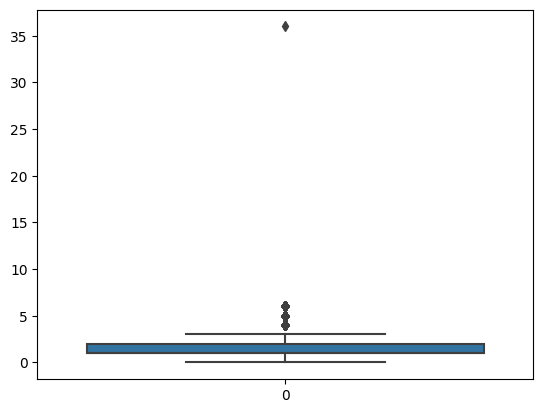

In [455]:
sns.boxplot(trip['passenger_count'])

<Axes: ylabel='passenger_count'>

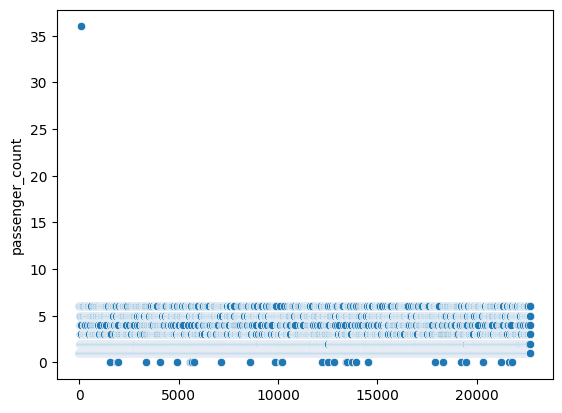

In [456]:
sns.scatterplot(x=trip.index, y=trip['passenger_count'])

In [457]:
trip[trip['passenger_count'] == 36]

,tpep_pickup_date,tpep_pickup_time,tpep_dropoff_date,tpep_dropoff_time,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
64,2017-10-05,09:39:28,2017-10-05,09:42:32,Debit Card,36,0.22,21.5,0.0,0.0


In [458]:
trip = trip[trip['passenger_count'] != 36]
trip

,tpep_pickup_date,tpep_pickup_time,tpep_dropoff_date,tpep_dropoff_time,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,2017-03-25,08:55:43,2017-03-25,09:09:47,Debit Card,6,3.34,13.0,2.76,0.00
1,2017-04-11,14:53:28,2017-04-11,15:19:58,Debit Card,1,1.80,16.0,4.00,0.00
2,2017-12-15,07:26:56,2017-12-15,07:34:08,Debit Card,1,1.00,6.5,1.45,0.00
3,2017-05-07,13:17:59,2017-05-07,13:48:14,Cash,1,3.70,20.5,6.39,0.00
4,2017-04-15,23:32:20,2017-04-15,23:49:03,Debit Card,1,4.37,16.5,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...
22696,2017-02-24,17:37:23,2017-02-24,17:40:39,Cash,3,0.61,4.0,0.00,0.00
22697,2017-08-06,16:43:59,2017-08-06,17:24:47,Cash,1,16.71,52.0,14.64,5.76
22698,2017-09-04,14:54:14,2017-09-04,14:58:22,Debit Card,1,0.42,4.5,0.00,0.00
22699,2017-07-15,12:56:30,2017-07-15,13:08:26,Debit Card,1,2.36,10.5,1.70,0.00


2. trip_distance

- 주행 거리가 0인 데이터는 이상치로 보고 처리한다
- 승하차 시간도 확인하였으나 그렇게 좋은 데이터라고 생각할 수 없기 때문에 삭제하기로 하였다.

In [459]:
trip[trip['trip_distance'] == 0]

,tpep_pickup_date,tpep_pickup_time,tpep_dropoff_date,tpep_dropoff_time,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
129,2017-06-22,08:05:33,2017-06-22,08:05:40,Debit Card,1,0.0,20.0,0.00,0.0
248,2017-09-18,20:50:53,2017-09-18,20:51:03,Cash,1,0.0,2.5,0.00,0.0
293,2017-10-04,19:46:24,2017-10-04,19:46:50,Cash,1,0.0,2.5,0.00,0.0
321,2017-02-22,04:01:44,2017-02-22,04:01:53,Cash,1,0.0,2.5,0.00,0.0
426,2017-01-14,07:00:26,2017-01-14,07:00:53,Cash,1,0.0,2.5,6.70,0.0
...,...,...,...,...,...,...,...,...,...,...
22192,2017-10-16,08:34:07,2017-10-16,08:34:10,Credit Card,1,0.0,2.5,0.00,0.0
22327,2017-07-21,23:30:29,2017-07-21,23:31:12,Debit Card,1,0.0,16.8,3.42,0.0
22385,2017-01-07,04:48:42,2017-01-07,04:51:03,Cash,1,0.0,10.0,0.00,0.0
22568,2017-03-07,02:24:47,2017-03-07,02:24:50,Credit Card,1,0.0,0.0,0.00,0.0


<Axes: >

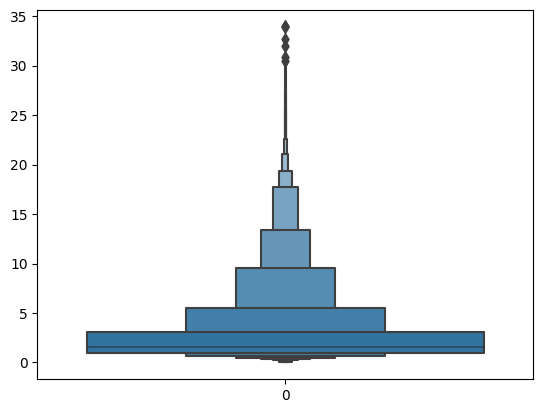

In [460]:
sns.boxenplot(trip['trip_distance'])

<Axes: ylabel='trip_distance'>

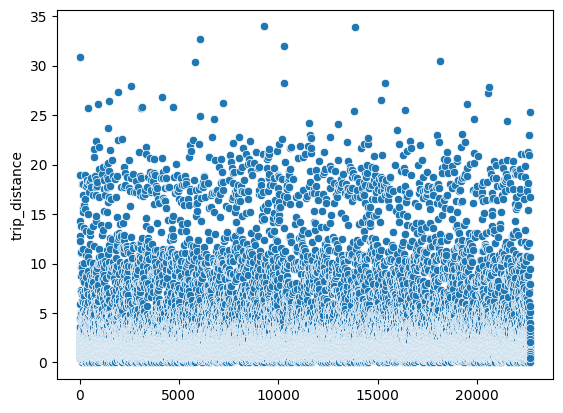

In [461]:
sns.scatterplot(x=trip.index, y=trip['trip_distance'])

In [471]:
trip['time_difference'] = (pd.to_datetime(trip['tpep_dropoff_time'], format="%H:%M:%S")
                          - pd.to_datetime(trip['tpep_pickup_time'], format="%H:%M:%S")).astype(str)
trip

/var/folders/zw/1zmd_ykn3zbd2m00vrvhv5m40000gn/T/ipykernel_24891/1831869928.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trip['time_difference'] = (pd.to_datetime(trip['tpep_dropoff_time'], format="%H:%M:%S")


,tpep_pickup_date,tpep_pickup_time,tpep_dropoff_date,tpep_dropoff_time,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,time_difference
0,2017-03-25,08:55:43,2017-03-25,09:09:47,Debit Card,6,3.34,13.0,2.76,0.00,0 days 00:14:04
1,2017-04-11,14:53:28,2017-04-11,15:19:58,Debit Card,1,1.80,16.0,4.00,0.00,0 days 00:26:30
2,2017-12-15,07:26:56,2017-12-15,07:34:08,Debit Card,1,1.00,6.5,1.45,0.00,0 days 00:07:12
3,2017-05-07,13:17:59,2017-05-07,13:48:14,Cash,1,3.70,20.5,6.39,0.00,0 days 00:30:15
4,2017-04-15,23:32:20,2017-04-15,23:49:03,Debit Card,1,4.37,16.5,0.00,0.00,0 days 00:16:43
...,...,...,...,...,...,...,...,...,...,...,...
22696,2017-02-24,17:37:23,2017-02-24,17:40:39,Cash,3,0.61,4.0,0.00,0.00,0 days 00:03:16
22697,2017-08-06,16:43:59,2017-08-06,17:24:47,Cash,1,16.71,52.0,14.64,5.76,0 days 00:40:48
22698,2017-09-04,14:54:14,2017-09-04,14:58:22,Debit Card,1,0.42,4.5,0.00,0.00,0 days 00:04:08
22699,2017-07-15,12:56:30,2017-07-15,13:08:26,Debit Card,1,2.36,10.5,1.70,0.00,0 days 00:11:56


In [472]:
trip[trip['trip_distance'] == 0]

,tpep_pickup_date,tpep_pickup_time,tpep_dropoff_date,tpep_dropoff_time,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,time_difference
129,2017-06-22,08:05:33,2017-06-22,08:05:40,Debit Card,1,0.0,20.0,0.00,0.0,0 days 00:00:07
248,2017-09-18,20:50:53,2017-09-18,20:51:03,Cash,1,0.0,2.5,0.00,0.0,0 days 00:00:10
293,2017-10-04,19:46:24,2017-10-04,19:46:50,Cash,1,0.0,2.5,0.00,0.0,0 days 00:00:26
321,2017-02-22,04:01:44,2017-02-22,04:01:53,Cash,1,0.0,2.5,0.00,0.0,0 days 00:00:09
426,2017-01-14,07:00:26,2017-01-14,07:00:53,Cash,1,0.0,2.5,6.70,0.0,0 days 00:00:27
...,...,...,...,...,...,...,...,...,...,...,...
22192,2017-10-16,08:34:07,2017-10-16,08:34:10,Credit Card,1,0.0,2.5,0.00,0.0,0 days 00:00:03
22327,2017-07-21,23:30:29,2017-07-21,23:31:12,Debit Card,1,0.0,16.8,3.42,0.0,0 days 00:00:43
22385,2017-01-07,04:48:42,2017-01-07,04:51:03,Cash,1,0.0,10.0,0.00,0.0,0 days 00:02:21
22568,2017-03-07,02:24:47,2017-03-07,02:24:50,Credit Card,1,0.0,0.0,0.00,0.0,0 days 00:00:03


In [489]:
trip['time_difference'] = pd.to_timedelta(trip['time_difference'])
trip[trip['time_difference'] < pd.to_timedelta('0 days 00:00:10')]

/var/folders/zw/1zmd_ykn3zbd2m00vrvhv5m40000gn/T/ipykernel_24891/116086758.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trip['time_difference'] = pd.to_timedelta(trip['time_difference'])


,tpep_pickup_date,tpep_pickup_time,tpep_dropoff_date,tpep_dropoff_time,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,time_difference
30,2017-11-06,20:30:50,2017-11-07,00:00:00,Credit Card,1,30.83,80.0,18.56,11.52,-1 days +03:29:10
121,2017-06-09,23:53:57,2017-06-10,00:02:51,Debit Card,1,1.90,9.0,0.00,0.00,-1 days +00:08:54
249,2017-12-06,23:37:08,2017-12-07,00:06:19,Credit Card,1,18.93,52.0,0.00,0.00,-1 days +00:29:11
280,2017-03-03,23:48:26,2017-03-04,00:01:25,Cash,1,2.81,12.0,2.00,0.00,-1 days +00:12:59
381,2017-09-24,23:45:45,2017-09-25,00:15:14,Credit Card,1,17.99,52.0,14.64,5.76,-1 days +00:29:29
...,...,...,...,...,...,...,...,...,...,...,...
22337,2017-08-03,23:58:03,2017-08-04,00:02:02,Credit Card,1,0.64,4.5,1.00,0.00,-1 days +00:03:59
22535,2017-10-03,23:53:14,2017-10-04,00:03:00,Debit Card,6,3.37,11.0,2.00,0.00,-1 days +00:09:46
22543,2017-08-16,23:55:04,2017-08-17,00:03:24,Debit Card,1,2.03,8.5,0.00,0.00,-1 days +00:08:20
22640,2017-04-03,21:02:49,2017-04-04,21:01:28,Credit Card,1,1.73,9.0,0.00,0.00,-1 days +23:58:39


In [487]:
trip = trip[trip['trip_distance'] != 0]
trip

,tpep_pickup_date,tpep_pickup_time,tpep_dropoff_date,tpep_dropoff_time,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,time_difference
0,2017-03-25,08:55:43,2017-03-25,09:09:47,Debit Card,6,3.34,13.0,2.76,0.00,0 days 00:14:04
1,2017-04-11,14:53:28,2017-04-11,15:19:58,Debit Card,1,1.80,16.0,4.00,0.00,0 days 00:26:30
2,2017-12-15,07:26:56,2017-12-15,07:34:08,Debit Card,1,1.00,6.5,1.45,0.00,0 days 00:07:12
3,2017-05-07,13:17:59,2017-05-07,13:48:14,Cash,1,3.70,20.5,6.39,0.00,0 days 00:30:15
4,2017-04-15,23:32:20,2017-04-15,23:49:03,Debit Card,1,4.37,16.5,0.00,0.00,0 days 00:16:43
...,...,...,...,...,...,...,...,...,...,...,...
22696,2017-02-24,17:37:23,2017-02-24,17:40:39,Cash,3,0.61,4.0,0.00,0.00,0 days 00:03:16
22697,2017-08-06,16:43:59,2017-08-06,17:24:47,Cash,1,16.71,52.0,14.64,5.76,0 days 00:40:48
22698,2017-09-04,14:54:14,2017-09-04,14:58:22,Debit Card,1,0.42,4.5,0.00,0.00,0 days 00:04:08
22699,2017-07-15,12:56:30,2017-07-15,13:08:26,Debit Card,1,2.36,10.5,1.70,0.00,0 days 00:11:56


3. fare_amount

- 요금이 음수인 데이터 이상치로 보고 처리한다.
- 음수를 양수로 바꾸어서 처리할 것이다.

In [479]:
trip[trip['fare_amount'] <= 0]

,tpep_pickup_date,tpep_pickup_time,tpep_dropoff_date,tpep_dropoff_time,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,time_difference
316,2017-12-13,02:02:39,2017-12-13,02:03:08,Cash,6,0.12,-2.5,0.0,0.0,0 days 00:00:29
1648,2017-07-05,11:02:23,2017-07-05,11:03:00,Credit Card,1,0.04,-2.5,0.0,0.0,0 days 00:00:37
4404,2017-12-20,16:06:53,2017-12-20,16:47:50,Cash,1,7.06,0.0,0.0,0.0,0 days 00:40:57
4425,2017-11-16,20:13:30,2017-11-16,20:14:50,Cash,2,0.06,-3.0,0.0,0.0,0 days 00:01:20
5450,2017-04-06,12:50:26,2017-04-06,12:52:39,Debit Card,1,0.25,-3.5,0.0,0.0,0 days 00:02:13
5724,2017-06-12,12:08:55,2017-06-12,12:08:57,Debit Card,1,0.00,0.0,0.0,0.0,0 days 00:00:02
5760,2017-01-03,20:15:23,2017-01-03,20:15:39,Debit Card,1,0.02,-2.5,0.0,0.0,0 days 00:00:16
8206,2017-10-28,20:39:36,2017-10-28,20:41:59,Credit Card,1,0.41,-3.5,0.0,0.0,0 days 00:02:23
10283,2017-06-05,17:34:25,2017-06-05,17:36:29,Credit Card,2,0.00,-2.5,0.0,0.0,0 days 00:02:04
10508,2017-03-30,03:14:26,2017-03-30,03:14:28,Debit Card,1,0.00,0.0,0.0,0.0,0 days 00:00:02


<Axes: >

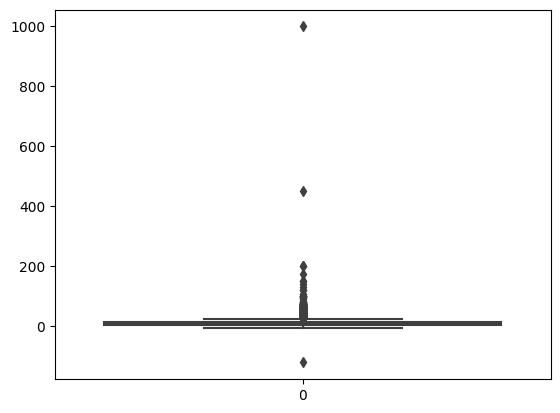

In [465]:
sns.boxplot(trip['fare_amount'])

<Axes: ylabel='fare_amount'>

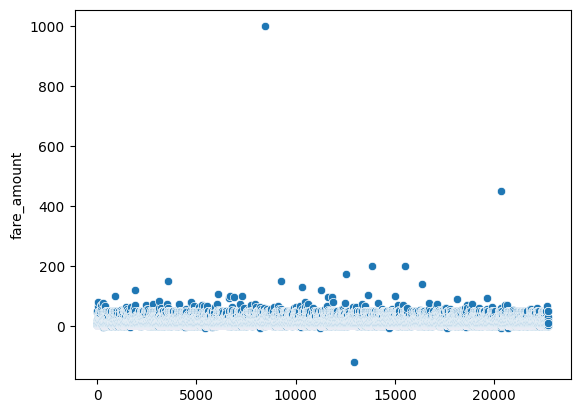

In [466]:
sns.scatterplot(x=trip.index, y=trip['fare_amount'])

In [480]:
trip[trip['fare_amount'] <= 0]['fare_amount'].unique()

array([  -2.5,    0. ,   -3. ,   -3.5,   -4.5, -120. ,   -4. ])

In [483]:
trip['fare_amount'] = trip['fare_amount'].replace({-2.5: 2.5, -3.0: 3.0 , -3.5: 3.5, -4.0: 4.0, -4.5: 4.5, -120.0: 120})
trip[trip['fare_amount'] < 0]

/var/folders/zw/1zmd_ykn3zbd2m00vrvhv5m40000gn/T/ipykernel_24891/2354629999.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trip['fare_amount'] = trip['fare_amount'].replace({-2.5: 2.5, -3.0: 3.0 , -3.5: 3.5, -4.0: 4.0, -4.5: 4.5, -120.0: 120})


,tpep_pickup_date,tpep_pickup_time,tpep_dropoff_date,tpep_dropoff_time,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,time_difference


## 범주형 데이터 변경

In [490]:
trip['payment_method'].unique()

array(['Debit Card', 'Cash', 'Credit Card'], dtype=object)

In [491]:
trip['payment_method'] = trip['payment_method'].replace({'Debit Card': 'Card', 'Credit Card': 'Card', 'Cash':'Cash'})
trip['payment_method'].unique()

/var/folders/zw/1zmd_ykn3zbd2m00vrvhv5m40000gn/T/ipykernel_24891/1679714497.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trip['payment_method'] = trip['payment_method'].replace({'Debit Card': 'Card', 'Credit Card': 'Card', 'Cash':'Cash'})


array(['Card', 'Cash'], dtype=object)

## ?-?

다른 데이터 보다가 이상한 데이터 있길래 비슷한 데이터가 또 있는지 찾아보려고 만듦

1. 10508번째 행

- 택시를 2초타고 결제는 카드로 했는데 금액, 거리 등이 찍혀있지 않았다.
    - 비슷한 행이 3개나 더 있다.
- 기록은 남았는데 어떤 상황이라고 생각해야할까?


In [468]:
trip.loc[10508]

tpep_pickup_date     2017-03-30
tpep_pickup_time       03:14:26
tpep_dropoff_date    2017-03-30
tpep_dropoff_time      03:14:28
payment_method       Debit Card
passenger_count               1
trip_distance               0.0
fare_amount                 0.0
tip_amount                  0.0
tolls_amount                0.0
Name: 10508, dtype: object

In [469]:
# 위와 비슷한 행 찾기
trip[(trip['trip_distance'] == 0) & (trip['fare_amount'] == 0)]

,tpep_pickup_date,tpep_pickup_time,tpep_dropoff_date,tpep_dropoff_time,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
5724,2017-06-12,12:08:55,2017-06-12,12:08:57,Debit Card,1,0.0,0.0,0.0,0.0
10508,2017-03-30,03:14:26,2017-03-30,03:14:28,Debit Card,1,0.0,0.0,0.0,0.0
22568,2017-03-07,02:24:47,2017-03-07,02:24:50,Credit Card,1,0.0,0.0,0.0,0.0


## 회고

결측치, 이상치 처리가 제일 어려운 거 같다.  
결측치 처리도 전에 프로젝트할 때 썼던 방법을 여러개 가져왔는데 많이 이상하게 나와서 여기서 제일 시간을 많이 잡아 먹은 거 같다.
일단은 최대한 간단한? 방법을 썼다..!   
다음에는 여러개 할 수 있는 시간이 되면 모든 방법을 써보려고 할 예정이다.  

이번에도 시간이 부족해서..마무리가 잘 안되는 느낌이지만 열심히 했다..

시간을 나눠서 빼고 싶었는데 이 부분이 데이터타입이 이상해서 인지 잘 안됐다..~  
이것만 좀 더 빠르게 했으면 시간을 줄일 수 있었는데 아쉽다.